In [1]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)

import geopandas as gpd

from keplergl import KeplerGl

In [2]:
df=pd.read_csv('../data/clean_data/listings.csv')

df=df[df.price<500]

df.head()

,id,host_id,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6369,13660,1,Hispanoamérica,Chamartín,40.45628,-3.67763,Apartment,Private room,2,1,1,0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",70,0,5,2,15,1,365,22,52,82,82,73,14,1,0,1,0
1,21853,83531,0,Cármenes,Latina,40.40341,-3.74084,Apartment,Private room,1,1,1,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",17,0,0,1,8,4,40,0,0,0,162,33,0,2,0,2,0
2,23001,82175,0,Legazpi,Arganzuela,40.38695,-3.69304,Apartment,Entire home/apt,6,2,3,5,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",50,300,30,1,10,15,730,2,2,2,213,0,0,6,6,0,0
3,24805,101471,0,Universidad,Centro,40.42202,-3.70395,Apartment,Entire home/apt,3,1,0,1,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",80,200,30,2,0,5,730,27,57,87,362,9,7,1,1,0,0
4,24836,101653,1,Justicia,Centro,40.41995,-3.69764,Apartment,Entire home/apt,4,1,2,3,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",115,200,0,4,0,3,10,24,54,77,342,67,15,1,1,0,0


In [3]:
df.shape

(20372, 32)

In [4]:
data_barrio=df.groupby('neighbourhood_cleansed').agg({'id':'count', 
                                                      'host_is_superhost': 'sum',
                                                      'accommodates': 'mean',
                                                      'bathrooms': 'mean',
                                                      'bedrooms': 'mean',
                                                      'beds': 'mean',
                                                      'price': 'mean',
                                                      'security_deposit': 'mean',
                                                      'cleaning_fee': 'mean',
                                                      'guests_included': 'mean',
                                                      'extra_people': 'mean',
                                                     })


data_barrio.reset_index(inplace=True)

data_barrio.columns=['neighbourhood', 'count_', 'superhosts', 'accommodates',
                     'bathrooms', 'bedrooms', 'beds', 'avg_price', 'security_deposit',
                     'cleaning_fee', 'guests_included', 'extra_people']

data_barrio.head()

,neighbourhood,count_,superhosts,accommodates,bathrooms,bedrooms,beds,avg_price,security_deposit,cleaning_fee,guests_included,extra_people
0,Abrantes,45,7,2.133333,1.133333,1.222222,1.533333,53.711111,6.666667,8.044444,1.333333,4.511111
1,Acacias,193,28,2.803109,1.139896,1.300518,1.756477,61.098446,64.663212,17.321244,1.471503,7.787565
2,Adelfas,74,11,3.621622,1.229730,1.364865,1.972973,66.270270,74.621622,17.405405,1.621622,5.121622
3,Aeropuerto,17,4,2.882353,1.058824,1.294118,1.823529,47.235294,26.470588,13.529412,1.588235,4.882353
4,Aguilas,44,5,2.090909,1.068182,1.181818,1.545455,56.227273,17.818182,6.772727,1.090909,8.295455


In [5]:
geo_neighbourhoods=gpd.read_file('../data/raw_data/neighbourhoods.geojson')

geo_neighbourhoods.head()

,neighbourhood,neighbourhood_group,geometry
0,Palacio,Centro,"MULTIPOLYGON (((-3.70584 40.42030, -3.70625 40..."
1,Embajadores,Centro,"MULTIPOLYGON (((-3.70384 40.41432, -3.70277 40..."
2,Cortes,Centro,"MULTIPOLYGON (((-3.69796 40.41929, -3.69645 40..."
3,Justicia,Centro,"MULTIPOLYGON (((-3.69546 40.41898, -3.69645 40..."
4,Universidad,Centro,"MULTIPOLYGON (((-3.70107 40.42134, -3.70155 40..."


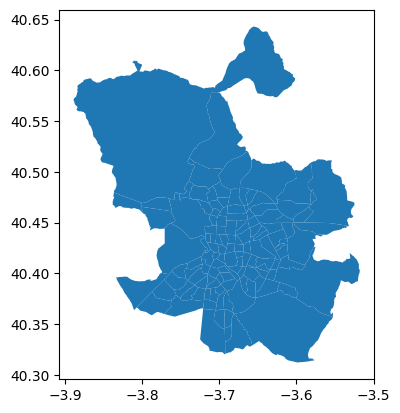

In [6]:
geo_neighbourhoods.geometry.plot();

In [7]:
geo_df=geo_neighbourhoods.merge(data_barrio, on='neighbourhood')

geo_df=gpd.GeoDataFrame(geo_df, geometry=geo_df.geometry)

geo_df.head()

,neighbourhood,neighbourhood_group,geometry,count_,superhosts,accommodates,bathrooms,bedrooms,beds,avg_price,security_deposit,cleaning_fee,guests_included,extra_people
0,Palacio,Centro,"MULTIPOLYGON (((-3.70584 40.42030, -3.70625 40...",1483,346,3.757249,1.291976,1.415374,2.153742,93.662171,116.562374,28.723533,2.024949,8.998651
1,Embajadores,Centro,"MULTIPOLYGON (((-3.70384 40.41432, -3.70277 40...",2722,591,3.541881,1.178178,1.357090,2.066863,74.667157,96.354151,24.168626,1.964732,8.444893
2,Cortes,Centro,"MULTIPOLYGON (((-3.69796 40.41929, -3.69645 40...",982,254,4.048880,1.289206,1.417515,2.367617,95.994908,121.581466,33.276986,2.288187,9.567210
3,Justicia,Centro,"MULTIPOLYGON (((-3.69546 40.41898, -3.69645 40...",1155,225,3.479654,1.317749,1.298701,2.003463,96.723810,131.620779,29.060606,2.006061,8.391342
4,Universidad,Centro,"MULTIPOLYGON (((-3.70107 40.42134, -3.70155 40...",2035,416,3.353808,1.225553,1.236364,1.888943,85.914988,103.718428,25.856020,1.835381,8.380835


**Cuenta de airbnbs por barrio**

In [8]:
mapa_config={'version': 'v1',
                 'config': {'visState': {'filters': [],
                   'layers': [{'id': 'xtmpo8',
                     'type': 'geojson',
                     'config': {'dataId': 'Madrid',
                      'label': 'Madrid',
                      'color': [205, 225, 244],
                      'highlightColor': [252, 242, 26, 255],
                      'columns': {'geojson': 'geometry'},
                      'isVisible': True,
                      'visConfig': {'opacity': 0.8,
                       'strokeOpacity': 0.8,
                       'thickness': 0.5,
                       'strokeColor': [18, 92, 119],
                       'colorRange': {'name': 'Pink Wine 6',
                        'type': 'sequential',
                        'category': 'Uber',
                        'colors': ['#2C1E3D',
                         '#573660',
                         '#83537C',
                         '#A6758E',
                         '#C99DA4',
                         '#EDD1CA']},
                       'strokeColorRange': {'name': 'Global Warming',
                        'type': 'sequential',
                        'category': 'Uber',
                        'colors': ['#5A1846',
                         '#900C3F',
                         '#C70039',
                         '#E3611C',
                         '#F1920E',
                         '#FFC300']},
                       'radius': 10,
                       'sizeRange': [0, 10],
                       'radiusRange': [0, 50],
                       'heightRange': [0, 500],
                       'elevationScale': 24,
                       'enableElevationZoomFactor': True,
                       'stroked': True,
                       'filled': True,
                       'enable3d': True,
                       'wireframe': False},
                      'hidden': False,
                      'textLabel': [{'field': None,
                        'color': [255, 255, 255],
                        'size': 18,
                        'offset': [0, 0],
                        'anchor': 'start',
                        'alignment': 'center'}]},
                     'visualChannels': {'colorField': {'name': 'count_', 'type': 'integer'},
                      'colorScale': 'quantile',
                      'strokeColorField': None,
                      'strokeColorScale': 'quantile',
                      'sizeField': None,
                      'sizeScale': 'linear',
                      'heightField': {'name': 'count_', 'type': 'integer'},
                      'heightScale': 'linear',
                      'radiusField': None,
                      'radiusScale': 'linear'}}],
                   'interactionConfig': {'tooltip': {'fieldsToShow': {'Madrid': [{'name': 'neighbourhood',
                        'format': None},
                       {'name': 'count_', 'format': None},
                       {'name': 'avg_price', 'format': None}]},
                     'compareMode': True,
                     'compareType': 'absolute',
                     'enabled': True},
                    'brush': {'size': 0.5, 'enabled': False},
                    'geocoder': {'enabled': False},
                    'coordinate': {'enabled': False}},
                   'layerBlending': 'normal',
                   'splitMaps': [],
                   'animationConfig': {'currentTime': None, 'speed': 1}},
                  'mapState': {'bearing': 15.742954872682024,
                   'dragRotate': True,
                   'latitude': 40.4528372159404,
                   'longitude': -3.668369931912943,
                   'pitch': 53.611071522259095,
                   'zoom': 10.058119529840882,
                   'isSplit': False},
                  'mapStyle': {'styleType': 'satellite',
                   'topLayerGroups': {},
                   'visibleLayerGroups': {},
                   'threeDBuildingColor': [9.665468314072013,
                    17.18305478057247,
                    31.1442867897876],
                   'mapStyles': {}}}}
                

In [9]:
mapa=KeplerGl(height=600, width=800, config=mapa_config)  # inicializas el mapa

mapa.add_data(geo_df.copy(), 'Madrid')  # se añaden datos con un nombre

mapa.save_to_html(file_name='../img/mapa_cuenta.html')  # se guarda

mapa# se representa

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ../img/mapa_cuenta.html!


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'xtmpo8', 'type': '…

**Precio medio por barrio**

In [10]:
mapa2_config={'version': 'v1',
                 'config': {'visState': {'filters': [],
                   'layers': [{'id': '3m64kx8',
                     'type': 'geojson',
                     'config': {'dataId': 'Madrid',
                      'label': 'Madrid',
                      'color': [202, 242, 244],
                      'highlightColor': [252, 242, 26, 255],
                      'columns': {'geojson': 'geometry'},
                      'isVisible': True,
                      'visConfig': {'opacity': 0.8,
                       'strokeOpacity': 0.8,
                       'thickness': 0.5,
                       'strokeColor': [18, 92, 119],
                       'colorRange': {'name': 'Pink Wine 6',
                        'type': 'sequential',
                        'category': 'Uber',
                        'colors': ['#2C1E3D',
                         '#573660',
                         '#83537C',
                         '#A6758E',
                         '#C99DA4',
                         '#EDD1CA']},
                       'strokeColorRange': {'name': 'Global Warming',
                        'type': 'sequential',
                        'category': 'Uber',
                        'colors': ['#5A1846',
                         '#900C3F',
                         '#C70039',
                         '#E3611C',
                         '#F1920E',
                         '#FFC300']},
                       'radius': 10,
                       'sizeRange': [0, 10],
                       'radiusRange': [0, 50],
                       'heightRange': [0, 500],
                       'elevationScale': 17.4,
                       'enableElevationZoomFactor': True,
                       'stroked': True,
                       'filled': True,
                       'enable3d': True,
                       'wireframe': False},
                      'hidden': False,
                      'textLabel': [{'field': None,
                        'color': [255, 255, 255],
                        'size': 18,
                        'offset': [0, 0],
                        'anchor': 'start',
                        'alignment': 'center'}]},
                     'visualChannels': {'colorField': {'name': 'avg_price', 'type': 'real'},
                      'colorScale': 'quantile',
                      'strokeColorField': None,
                      'strokeColorScale': 'quantile',
                      'sizeField': None,
                      'sizeScale': 'linear',
                      'heightField': {'name': 'avg_price', 'type': 'real'},
                      'heightScale': 'linear',
                      'radiusField': None,
                      'radiusScale': 'linear'}}],
                   'interactionConfig': {'tooltip': {'fieldsToShow': {'Madrid': [{'name': 'neighbourhood',
                        'format': None},
                       {'name': 'avg_price', 'format': None},
                       {'name': 'count_', 'format': None}]},
                     'compareMode': False,
                     'compareType': 'absolute',
                     'enabled': True},
                    'brush': {'size': 0.5, 'enabled': False},
                    'geocoder': {'enabled': False},
                    'coordinate': {'enabled': False}},
                   'layerBlending': 'normal',
                   'splitMaps': [],
                   'animationConfig': {'currentTime': None, 'speed': 1}},
                  'mapState': {'bearing': 3.2660550458715605,
                   'dragRotate': True,
                   'latitude': 40.418132280553976,
                   'longitude': -3.6675547392865,
                   'pitch': 52.053764006523224,
                   'zoom': 10.524764239108396,
                   'isSplit': False},
                  'mapStyle': {'styleType': 'satellite',
                   'topLayerGroups': {},
                   'visibleLayerGroups': {},
                   'threeDBuildingColor': [3.7245996603793508,
                    6.518049405663864,
                    13.036098811327728],
                   'mapStyles': {}}}}
                

In [11]:
mapa2=KeplerGl(height=600, width=800, config=mapa2_config)  

mapa2.add_data(geo_df.copy(), 'Madrid')  

mapa2.save_to_html(file_name='../img/mapa_precio_medio.html')  

mapa2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ../img/mapa_precio_medio.html!


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '3m64kx8', 'type': …

**Por comodidades**

In [12]:
mapa3_config={'version': 'v1',
             'config': {'visState': {'filters': [],
               'layers': [{'id': 'm6eysa',
                 'type': 'geojson',
                 'config': {'dataId': 'Madrid',
                  'label': 'Madrid',
                  'color': [119, 110, 87],
                  'highlightColor': [252, 242, 26, 255],
                  'columns': {'geojson': 'geometry'},
                  'isVisible': True,
                  'visConfig': {'opacity': 0.8,
                   'strokeOpacity': 0.8,
                   'thickness': 0.5,
                   'strokeColor': [23, 184, 190],
                   'colorRange': {'name': 'Pink Wine 6',
                    'type': 'sequential',
                    'category': 'Uber',
                    'colors': ['#2C1E3D',
                     '#573660',
                     '#83537C',
                     '#A6758E',
                     '#C99DA4',
                     '#EDD1CA']},
                   'strokeColorRange': {'name': 'Global Warming',
                    'type': 'sequential',
                    'category': 'Uber',
                    'colors': ['#5A1846',
                     '#900C3F',
                     '#C70039',
                     '#E3611C',
                     '#F1920E',
                     '#FFC300']},
                   'radius': 10,
                   'sizeRange': [0, 10],
                   'radiusRange': [0, 50],
                   'heightRange': [0, 500],
                   'elevationScale': 29.7,
                   'enableElevationZoomFactor': True,
                   'stroked': True,
                   'filled': True,
                   'enable3d': True,
                   'wireframe': False},
                  'hidden': False,
                  'textLabel': [{'field': None,
                    'color': [255, 255, 255],
                    'size': 18,
                    'offset': [0, 0],
                    'anchor': 'start',
                    'alignment': 'center'}]},
                 'visualChannels': {'colorField': {'name': 'neighbourhood',
                   'type': 'string'},
                  'colorScale': 'ordinal',
                  'strokeColorField': None,
                  'strokeColorScale': 'quantile',
                  'sizeField': None,
                  'sizeScale': 'linear',
                  'heightField': {'name': 'superhosts', 'type': 'integer'},
                  'heightScale': 'linear',
                  'radiusField': None,
                  'radiusScale': 'linear'}}],
               'interactionConfig': {'tooltip': {'fieldsToShow': {'Madrid': [{'name': 'neighbourhood',
                    'format': None},
                   {'name': 'count_', 'format': None},
                   {'name': 'superhosts', 'format': None},
                   {'name': 'accommodates', 'format': None},
                   {'name': 'bathrooms', 'format': None},
                   {'name': 'bedrooms', 'format': None},
                   {'name': 'beds', 'format': None},
                   {'name': 'avg_price', 'format': None}]},
                 'compareMode': False,
                 'compareType': 'absolute',
                 'enabled': True},
                'brush': {'size': 0.5, 'enabled': False},
                'geocoder': {'enabled': False},
                'coordinate': {'enabled': False}},
               'layerBlending': 'normal',
               'splitMaps': [],
               'animationConfig': {'currentTime': None, 'speed': 1}},
              'mapState': {'bearing': 24,
               'dragRotate': True,
               'latitude': 40.45992604327777,
               'longitude': -3.665546251002681,
               'pitch': 50,
               'zoom': 10,
               'isSplit': False},
              'mapStyle': {'styleType': 'satellite',
               'topLayerGroups': {},
               'visibleLayerGroups': {},
               'threeDBuildingColor': [3.7245996603793508,
                6.518049405663864,
                13.036098811327728],
               'mapStyles': {}}}}

In [13]:
mapa3=KeplerGl(height=600, width=800, config=mapa3_config)  

mapa3.add_data(geo_df.copy(), 'Madrid')  

mapa3.save_to_html(file_name='../img/mapa_comodidades.html')  

mapa3

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ../img/mapa_comodidades.html!


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'm6eysa', 'type': '…

**Por gastos extra**

In [14]:
mapa4_config={'version': 'v1',
                 'config': {'visState': {'filters': [],
                   'layers': [{'id': 'vcsyvas',
                     'type': 'geojson',
                     'config': {'dataId': 'Madrid',
                      'label': 'Madrid',
                      'color': [255, 203, 153],
                      'highlightColor': [252, 242, 26, 255],
                      'columns': {'geojson': 'geometry'},
                      'isVisible': True,
                      'visConfig': {'opacity': 0.8,
                       'strokeOpacity': 0.8,
                       'thickness': 0.5,
                       'strokeColor': [248, 149, 112],
                       'colorRange': {'name': 'Pink Wine 6',
                        'type': 'sequential',
                        'category': 'Uber',
                        'colors': ['#2C1E3D',
                         '#573660',
                         '#83537C',
                         '#A6758E',
                         '#C99DA4',
                         '#EDD1CA']},
                       'strokeColorRange': {'name': 'Global Warming',
                        'type': 'sequential',
                        'category': 'Uber',
                        'colors': ['#5A1846',
                         '#900C3F',
                         '#C70039',
                         '#E3611C',
                         '#F1920E',
                         '#FFC300']},
                       'radius': 10,
                       'sizeRange': [0, 10],
                       'radiusRange': [0, 50],
                       'heightRange': [0, 500],
                       'elevationScale': 33.3,
                       'enableElevationZoomFactor': True,
                       'stroked': True,
                       'filled': True,
                       'enable3d': True,
                       'wireframe': False},
                      'hidden': False,
                      'textLabel': [{'field': None,
                        'color': [255, 255, 255],
                        'size': 18,
                        'offset': [0, 0],
                        'anchor': 'start',
                        'alignment': 'center'}]},
                     'visualChannels': {'colorField': {'name': 'avg_price',
                       'type': 'string'},
                      'colorScale': 'ordinal',
                      'strokeColorField': None,
                      'strokeColorScale': 'quantile',
                      'sizeField': None,
                      'sizeScale': 'linear',
                      'heightField': {'name': 'avg_price', 'type': 'real'},
                      'heightScale': 'linear',
                      'radiusField': None,
                      'radiusScale': 'linear'}}],
                   'interactionConfig': {'tooltip': {'fieldsToShow': {'Madrid': [{'name': 'neighbourhood',
                        'format': None},
                       {'name': 'count_', 'format': None},
                       {'name': 'avg_price', 'format': None},
                       {'name': 'cleaning_fee', 'format': None},
                       {'name': 'guests_included', 'format': None},
                       {'name': 'extra_people', 'format': None},
                       {'name': 'security_deposit', 'format': None}]},
                     'compareMode': False,
                     'compareType': 'absolute',
                     'enabled': True},
                    'brush': {'size': 0.5, 'enabled': False},
                    'geocoder': {'enabled': False},
                    'coordinate': {'enabled': False}},
                   'layerBlending': 'normal',
                   'splitMaps': [],
                   'animationConfig': {'currentTime': None, 'speed': 1}},
                  'mapState': {'bearing': 2.5321100917431174,
                   'dragRotate': True,
                   'latitude': 40.47280494651167,
                   'longitude': -3.656539689624843,
                   'pitch': 50,
                   'zoom': 10,
                   'isSplit': False},
                  'mapStyle': {'styleType': 'satellite',
                   'topLayerGroups': {},
                   'visibleLayerGroups': {},
                   'threeDBuildingColor': [3.7245996603793508,
                    6.518049405663864,
                    13.036098811327728],
                   'mapStyles': {}}}}

In [15]:
mapa4=KeplerGl(height=600, width=800, config=mapa4_config)  

mapa4.add_data(geo_df.copy(), 'Madrid')  

mapa4.save_to_html(file_name='../img/mapa_extra.html')  

mapa4

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to ../img/mapa_extra.html!


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'vcsyvas', 'type': …